In [184]:
# Import Dependencies
import requests
import json

# Define the API key
api_key = "llhq7n5rh6"

# Import pprint
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas


In [148]:
# fetch data from eBird_observation_data.csv
file_path = "/Users/vrindapatel/Documents/GitHub/eBird-Data-Visualisation/Resources/eBird_observations_data.csv"
eBird_data = pd.read_csv(file_path)
eBird_data.tail()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,formatted_address,exoticCategory
691,grbhon1,Green-backed Honeyeater,Glycichaera fallax,L2038367,Kutini-Payamu (Iron Range) National Park,2024-05-18 07:00,5.0,-12.659014,143.347378,True,False,False,S176438326,"88RW+9X Iron Range QLD, Australia",NaN
692,nosrob1,Northern Scrub-Robin,Drymodes superciliaris,L2038367,Kutini-Payamu (Iron Range) National Park,2024-05-18 07:00,2.0,-12.659014,143.347378,True,False,False,S176438326,"88RW+9X Iron Range QLD, Australia",NaN
693,sccpar1,Scarlet-chested Parrot,Neophema splendida,L31875841,"6431, Plumridge Lakes AU-WA (-29.4746,124.4909)",2024-05-17 12:40,2.0,-29.474602,124.490901,True,False,True,S175031406,5Q26GFGR+59,NaN
694,comred1,Common Redshank,Tringa totanus,L3442562,Wader Spit (Roebuck Bay),2024-05-15 15:24,1.0,-17.979327,122.336533,True,False,False,S174619127,5QJ428CP+7J,NaN
695,bluebo4,Naretha Bluebonnet,Northiella narethae,L2536340,Koonalda Homestead,2024-05-15 08:37,2.0,-31.455680,129.858270,True,False,False,S175606155,4QWFGVV5+P8,NaN


In [149]:
eBird_data.df=pd.DataFrame(eBird_data)
eBird_data.df.head()

/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_2982/845169410.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  eBird_data.df=pd.DataFrame(eBird_data)


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,formatted_address,exoticCategory
0,tawfro1,Tawny Frogmouth,Podargus strigoides,L28355910,"Yard List, Ashgrove",2024-06-12 20:18,1.0,-27.449830,152.977161,True,False,True,S180932085,"220B Coopers Camp Rd, Ashgrove QLD 4060, Austr...",NaN
1,latnig2,Large-tailed Nightjar,Caprimulgus macrurus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:58,1.0,-12.396642,130.847231,True,False,False,S180927762,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
2,rabeat1,Rainbow Bee-eater,Merops ornatus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,3.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
3,ayweye3,Australian Yellow White-eye,Zosterops luteus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,3.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
4,norfan1,Northern Fantail,Rhipidura rufiventris,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,1.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN


In [150]:
# get total number of observations
total_observations = eBird_data["comName"].count()
total_observations


696

In [151]:
#Print column names, data types
column_names = eBird_data.columns
column_names


Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'formatted_address', 'exoticCategory'],
      dtype='object')

In [152]:
top_ten_species = eBird_data.df["comName"].value_counts().nlargest(10).index.tolist()
top_ten_species_df = eBird_data.df[eBird_data.df["comName"].isin(top_ten_species)]
top_ten_species_df.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,formatted_address,exoticCategory
0,tawfro1,Tawny Frogmouth,Podargus strigoides,L28355910,"Yard List, Ashgrove",2024-06-12 20:18,1.0,-27.449830,152.977161,True,False,True,S180932085,"220B Coopers Camp Rd, Ashgrove QLD 4060, Austr...",NaN
1,latnig2,Large-tailed Nightjar,Caprimulgus macrurus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:58,1.0,-12.396642,130.847231,True,False,False,S180927762,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
2,rabeat1,Rainbow Bee-eater,Merops ornatus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,3.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
3,ayweye3,Australian Yellow White-eye,Zosterops luteus,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,3.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN
4,norfan1,Northern Fantail,Rhipidura rufiventris,L1175729,Mangroves near Orchard Rd (Coconut Grove),2024-06-12 18:36,1.0,-12.396642,130.847231,True,False,False,S180926578,"21 Orchard Rd, Coconut Grove NT 0810, Australia",NaN


In [200]:
# scatter plot of top 10 species by location observed in Australia
top_ten_species_df.hvplot.scatter(
    x = "comName",
    y = "howMany",
    title = "Top 10 Bird Species Observed in Australia",
    xlabel = "Species",
    ylabel = "Number of Observations",
    height = 400,
    width = 800,
    rot = 45
)

:Scatter   [comName]   (howMany)

In [162]:
from bokeh.plotting import show
from bokeh.io import output_notebook
from holoviews.plotting.bokeh import BokehRenderer

# Convert the HoloViews object to a Bokeh object
bokeh_obj = BokehRenderer.get_plot(obs_map).state

# Display the plot in a new browser window
show(bokeh_obj)

from bokeh.plotting import save

# Save the plot as an HTML file
save(bokeh_obj, filename='plot.html')

/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_2982/2087273230.py:14: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(bokeh_obj, filename='plot.html')
/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_2982/2087273230.py:14: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(bokeh_obj, filename='plot.html')


'/Users/vrindapatel/plot.html'

In [155]:
# extract the states from formatted_address column
eBird_data["state"] = eBird_data["formatted_address"].str.split(", ").str[-2]
eBird_data.head()

# no. of observation by state
state_observation = eBird_data["state"].value_counts()
state_observation

state
Coconut Grove NT 0810       36
HR9H+F7 Kalkarindji NT      18
Little Mulgrave QLD 4865    16
Monkland QLD 4570           13
Karumba QLD 4891            13
                            ..
Tenterfield NSW 2372         1
Kambah ACT 2902              1
North Shields SA 5607        1
Moama NSW 2731               1
Bushmead WA 6055             1
Name: count, Length: 272, dtype: int64

In [194]:
# bar chart of top 10 observation by state
# Assuming state_observation is a DataFrame with a 'state' column and an 'Observations' column
# Sort the Series in descending order and select the top 10
top_10_state_observation = state_observation.sort_values(ascending=False).head(10)

# Bar chart of top 10 observations by state
top_10_state_observation.hvplot.bar(
    title = "Top 10 Bird Observations by Suburb",
    xlabel = "Suburb",
    ylabel = "Number of Observations",
    rot = 45,
    height = 400,
    width = 800
)

:Bars   [state]   (count)

In [185]:
headers = {
  'X-eBirdApiToken': api_key
}
# Fetch the list of states in Australia
states_url = 'https://api.ebird.org/v2/ref/region/list/subnational1/AU.json'
states_response = requests.get(states_url, headers=headers)
states = states_response.json()

# For each state, fetch the bird data
for state in states:
    state_code = state['code']
    bird_data_url = f'https://api.ebird.org/v2/data/obs/{state_code}/recent?back=30'
    bird_data_response = requests.get(bird_data_url, headers=headers)
    if bird_data_response.status_code == 200:
        bird_data = bird_data_response.json()
    else:
        print(bird_data_response.status_code)
        print(bird_data_response.text)

In [186]:
# list of states
states_list = [state['code'] for state in states]
states_list

['AU-ACT', 'AU-NSW', 'AU-NT', 'AU-QLD', 'AU-SA', 'AU-TAS', 'AU-VIC', 'AU-WA']

In [191]:
# create a dictionary to store the bird data for each state
birds_data = {}
for state in states:
    state_code = state['code']
    bird_data_url = f'https://api.ebird.org/v2/data/obs/{state_code}/recent?back=30'
    bird_data_response = requests.get(bird_data_url, headers=headers)
    if bird_data_response.status_code == 200:
        bird_data = bird_data_response.json()
        birds_data[state_code] = bird_data
    else:
        print(bird_data_response.status_code)
        print(bird_data_response.text)
        
state_counts = {}
for state in birds_data.keys():
    state_counts[state] = len(birds_data[state])
    
state_counts_df = pd.DataFrame.from_dict(state_counts, orient='index', columns=['Observations'])
state_counts_df.reset_index(inplace=True)
state_counts_df.rename(columns={'index': 'State'}, inplace=True)
state_counts_df

,State,Observations
0,AU-ACT,163
1,AU-NSW,410
2,AU-NT,322
3,AU-QLD,500
4,AU-SA,308
5,AU-TAS,186
6,AU-VIC,315
7,AU-WA,413


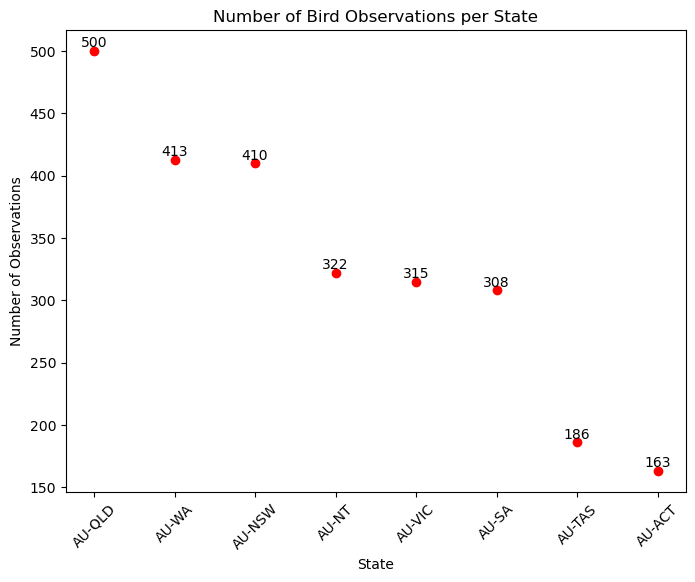

In [192]:
import matplotlib.pyplot as plt

# Assuming state_counts_df is your DataFrame and it has a column 'State' with state names and a column 'Observations' with the number of bird observations
state_counts_df = state_counts_df.sort_values('Observations', ascending=False)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(state_counts_df['State'], state_counts_df['Observations'], color='red')

# Add counts on top of the points
for i in range(len(state_counts_df)):
    plt.text(x=state_counts_df['State'].iloc[i], y=state_counts_df['Observations'].iloc[i] + 0.8, s=state_counts_df['Observations'].iloc[i], ha='center', va='bottom')

plt.title('Number of Bird Observations per State')
plt.xlabel('State')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

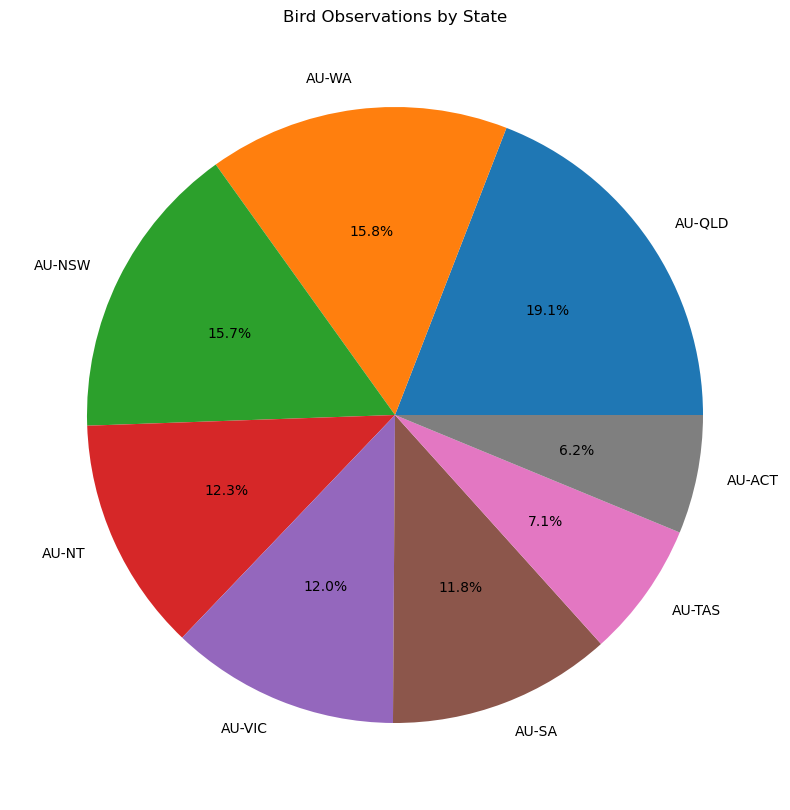

In [193]:
import matplotlib.pyplot as plt

# Assuming state_counts_df is your DataFrame and it has a column 'Observations' with counts of bird observations for each 'State'
data = state_counts_df.set_index('State')['Observations']

plt.figure(figsize=(10,10))
plt.pie(data, labels = data.index, autopct='%1.1f%%')
plt.title('Bird Observations by State')
plt.show()